<a href="https://colab.research.google.com/github/tsatir/Thinkful-Data_Science/blob/master/Fraud_Detection_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TalkingData AdTracking Fraud Detection Challenge 

Fraud risk is everywhere, but for companies that advertise online, click fraud can happen at an overwhelming volume, resulting in misleading click data and wasted money. Ad channels can drive up costs by simply clicking on the ad at a large scale. With over 1 billion smart mobile devices in active use every month, China is the largest
mobile market in the world and therefore suffers from huge volumes of fradulent traffic. 

Build an algorithm that predicts whether a user will download an app after clicking a mobile app ad. To support your modeling, they have provided a generous dataset covering approximately 200 million clicks over 4 days!

Data : https://www.kaggle.com/vchoubey/random-forest-mean-encoding-for-app-channel

Our dataset:
- ip: ip address of click.
- app: app id for marketing.
- device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
- os: os version id of user mobile phone
- channel: channel id of mobile ad publisher
- click_time: timestamp of click (UTC)
- attributed_time: if user download the app for after clicking an ad, this is the time of the app download
- is_attributed: the target that is to be predicted, indicating the app was downloaded

In [0]:
import pandas as pd

In [0]:
train_data = pd.read_csv("/Users/Tugce/Downloads/talkingdata-adtracking-fraud-detection/train.csv", nrows=30000000)
#test_data = pd.read_csv("/Users/Tugce/Downloads/talkingdata-adtracking-fraud-detection/test.csv")
#train_data_1 = train_data.sample(n=30000000, random_state=1)

In [0]:
train_sample_data = pd.read_csv("/Users/Tugce/Downloads/talkingdata-adtracking-fraud-detection/train_sample.csv")

In [0]:
train_sample_data.shape

(100000, 8)

In [0]:
train_data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
38248623,39322,13,1,12,477,2017-11-07 09:03:48,NaN,0
175997392,295018,18,1,22,107,2017-11-09 13:17:56,NaN,0
83503238,86767,3,1,46,280,2017-11-08 04:21:27,NaN,0
118554027,248820,3,1,53,280,2017-11-08 14:57:05,NaN,0
12910638,109776,2,1,19,477,2017-11-07 00:59:57,NaN,0


In [0]:
train_sample_data.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [0]:
train_sample_data.drop(['click_time','attributed_time'], 1, inplace =True)

In [0]:
train_data.head()

,ip,app,device,os,channel,is_attributed
0,83230,3,1,13,379,0
1,17357,3,1,19,379,0
2,35810,3,1,13,379,0
3,45745,14,1,13,478,0
4,161007,3,1,13,379,0


In [0]:
train_sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
ip               100000 non-null int64
app              100000 non-null int64
device           100000 non-null int64
os               100000 non-null int64
channel          100000 non-null int64
is_attributed    100000 non-null int64
dtypes: int64(6)
memory usage: 4.6 MB


In [0]:
# Random Forest 

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = train_sample_data.drop('is_attributed',1)
Y = train_sample_data['is_attributed']

In [0]:
print(X.shape)
print(Y.shape)

(100000, 5)
(100000,)


In [0]:
rfc.fit(X, Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
cross_val_score(rfc, X, Y, cv=10)

array([0.9980002 , 0.99740026, 0.9980002 , 0.9979    , 0.9976    ,
       0.9979    , 0.9977    , 0.99779978, 0.99779978, 0.99849985])

# Decision Tree

In [0]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

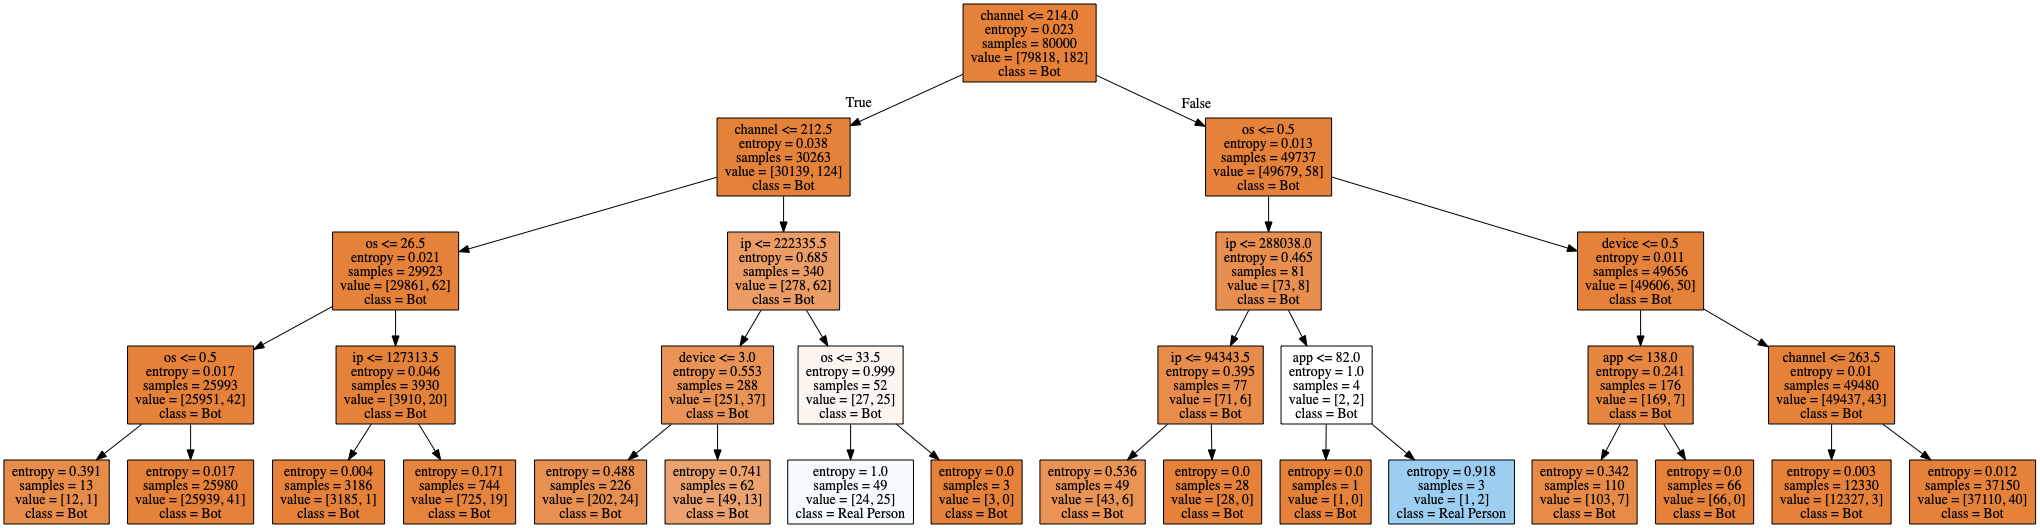

In [0]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
dtc = decision_tree.fit(X_train, y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_train.columns,
    class_names=['Bot', 'Real Person'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [0]:
#Predict the response for test dataset
y_pred = dtc.predict(X_test)

In [0]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.99755
